# Tarea: Infinity War Pt.1

El objetivo de este
Primeramente hay que cargar librerías necesarias para la siguiente tarea

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

## k-means clustering

Los datos se generarán de manera aleatoria, siguiendo dos distribuciones _lognormal_ (como una normal chueca). Las "Etiquetas" de cada grupo de datos estarán ocultas en primer lugar, están dentro de la variable `labels`. Nos va a servir únicamente para verificar qué tan bien lo ha hecho el algoritmo:

In [52]:
data = pd.DataFrame(columns = ['X1','X2','Color'])
#Generado de la primer distribución
for i in range(0,200):
    data.loc[i] = [np.random.lognormal(2,0.4), np.random.lognormal(2,0.4), 0]
#Generado de la segunda distribución
for i in range(0,200):
    data.loc[i+200] = [25 - np.random.lognormal(2,0.4), 25 - np.random.lognormal(2,0.4), 1]

data = data.sample(frac=1).reset_index(drop=True)
labels = data.Color
data = data.drop(columns = ["Color"])

Podemos dar un vistazo a los datos con la siguiente función. Es claro que hay "Dos grupos" pero queremos una manera exacta de separarlos, discriminarlos

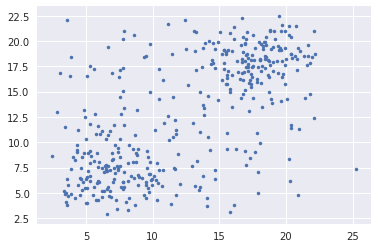

In [53]:
plt.plot(data.X1, data.X2,'.')
plt.show()

In [54]:
"""Vamos a escribir a manita el algoritmo de k-means clustering, pues es muy sencillo. Para ello habrá que rellenar
campos de la siguiente función"""

def kMeansClusters(data, k = 2):
    """Calculates the k centroids to divide the data"""
    #El siguiente argumento hace una matriz de "Rangos"
    ranges = np.concatenate( (np.matrix(data.min().values),np.matrix(data.max().values)) ).T
    #Con ella, se hace un vector aleatorio de las dimensiones de cada renglón de nuestros datos
    rVec = np.matrix(np.random.random(ranges.shape[0])).T
    #Se añade un centroide
    centroids = (np.multiply(ranges[:,1]-ranges[:,0],rVec) + ranges[:,0]).T
    #Se añaden el resto de los centroides
    for i in range(1,k):
        rVec = np.matrix(np.random.random(ranges.shape[0])).T
        centroids = np.concatenate((centroids,(np.multiply(ranges[:,1]-ranges[:,0],rVec) + ranges[:,0]).T))
        
    #Rellene la siguiente lambda para calcular el índice del centroide que más cerca esté a un renglón
    # Bien podría ser la definición de una función, si no es suficiente
    closest = lambda row, i, j, centroids: j if i>=len(centroids) else closest(row, i+1,
              i if np.linalg.norm(centroids[i]-row)<np.linalg.norm(centroids[j]-row) else j, centroids)
    changed = True;
    labels = [closest(data.get_values()[i],0 ,0 , centroids) for i in range(len(data))]
    while changed:
        oldLabels = labels
        ncentroids=centroids
        #Aquí se calculan las distancias
        labels = [closest(data.get_values()[i],0 ,0 , centroids) for i in range(len(data))]
        labelsNum = []
        for l in range(k):
            labelsN=[]
            for i in range(len(labels)):
                if labels[i]==l:
                    labelsN.append(data.get_values()[i])
            labelsNum.append(labelsN)
        #Actualice aquí la posición de los "centroides"
        #########################################
        #centroids=np.matrix([np.array(labels0).sum(0)/len(labels0),np.array(labels1).sum(0)/len(labels1)])
        centroids=np.matrix([np.array(i).sum(0)/len(i) for i in labelsNum])
        #Actualice el valor de la variable "changed", debe ser false si los centroides no se movieron
        if(ncentroids.all()==centroids.all()):
            changed = False
    return centroids, labels

Por último, ejecutamos el algoritmo

In [55]:
centroids, predLabels = kMeansClusters(data, 2)
print(predLabels)

[1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 

El siguiente bloque de código grafica los clusters en colores: Rojo un grupo, Azúl el otro, Verdes los puntos que están clasificados de manera incorrecta, cyan los centroides y ya.

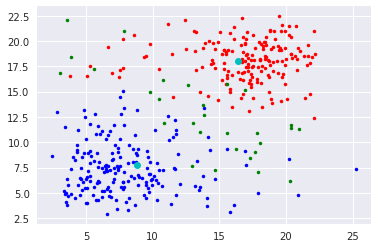

Porcentaje de clasificación:  0.9275


In [56]:
#We swap the labels to to get the one with the highest percentage
predLabels = np.logical_not(predLabels) if np.sum(predLabels == labels)/labels.shape[0] < 0.5 else predLabels
#First we plot correct group 0 labels
corrBlue = np.logical_and(labels == predLabels, labels == 0)
plt.plot(data[corrBlue].X1, data[corrBlue].X2,'b.')
plt.plot(centroids[0,0], centroids[0,1], 'co') #Cyan color
#Second we plot correct group 1 labels
corrRed = np.logical_and(labels == predLabels, labels == 1)
plt.plot(data[corrRed].X1, data[corrRed].X2,'r.')
plt.plot(centroids[1,0], centroids[1,1], 'co') #Cyan color
#Third, we plot incorrect labels
corrInc = labels != predLabels
plt.plot(data[corrInc].X1, data[corrInc].X2,'g.')
plt.show()

print("Porcentaje de clasificación: ", np.sum(predLabels == labels)/labels.shape[0])